In [19]:
import yfinance as yf
import pandas as pd
from IPython.display import display,clear_output

# Lista de tickers de ações e do petróleo Brent
tickers = ["BZ=F","RRRP3.SA", "CSAN3.SA", "ENAT3.SA", "PETR3.SA", "PETR4.SA", "PRIO3.SA", "RPMG3.SA", "VBBR3.SA", "UGPA3.SA", "LUPA3.SA", "OPCT3.SA", "OSXB3.SA", '^BVSP']

# Defina a data de início e fim do histórico (ampla janela de tempo)
start_date = "2000-01-01"
end_date = "2023-10-27"

# Crie um DataFrame vazio para armazenar os preços de fechamento
historical_data = pd.DataFrame()

# Captura os dados de preços de fechamento para cada ticker
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    historical_data[ticker] = data["Adj Close"]

# Arruma as colunas 
historical_data.columns = ["Brent","RRRP3", "CSAN3", "ENAT3", "PETR3", "PETR4", "PRIO3", "RPMG3", "VBBR3", "UGPA3", "LUPA3", "OPCT3", "OSXB3",'IBOV']

# Limpa o Output
clear_output()

# Exibe os dados 
historical_data.head(5)

,Brent,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3,RPMG3,VBBR3,UGPA3,LUPA3,OPCT3,OSXB3,IBOV
Date,,,,,,,,,,,,,,
2007-07-30,75.739998,NaN,4.743986,NaN,10.254101,7.514801,NaN,28.744200,NaN,5.743484,7851.945801,NaN,NaN,54573.0
2007-07-31,77.050003,NaN,4.557101,NaN,10.091990,7.394230,NaN,27.945749,NaN,5.743484,7643.980957,NaN,NaN,54183.0
2007-08-01,75.349998,NaN,4.736798,NaN,9.958006,7.416662,NaN,27.746138,NaN,5.743484,7268.629395,NaN,NaN,54234.0
2007-08-02,75.760002,NaN,4.623230,NaN,10.040712,7.404042,NaN,27.945749,NaN,5.743484,7101.243164,NaN,NaN,54691.0
2007-08-03,74.750000,NaN,4.600228,NaN,9.668530,7.066155,NaN,27.546524,NaN,5.743484,7185.781738,NaN,NaN,52846.0


In [37]:
print(round(historical_data.describe().T,2).to_latex( escape=False))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &      mean &       std &       min &       25% &       50% &       75% &        max \\
\midrule
Brent &  4031.0 &     78.56 &     25.17 &     19.33 &     58.24 &     75.91 &    102.74 &     146.08 \\
RRRP3 &   713.0 &     36.59 &      5.63 &     20.80 &     32.35 &     36.03 &     40.84 &      51.31 \\
CSAN3 &  3872.0 &      8.47 &      5.69 &      1.23 &      4.02 &      6.63 &     11.59 &      24.20 \\
ENAT3 &  3041.0 &      7.89 &      4.42 &      1.86 &      4.16 &      6.90 &     10.77 &      23.24 \\
PETR3 &  3872.0 &     10.85 &      6.30 &      2.28 &      6.48 &      9.50 &     12.76 &      41.56 \\
PETR4 &  3872.0 &      9.12 &      5.52 &      1.49 &      5.87 &      7.81 &     10.44 &      38.52 \\
PRIO3 &  3110.0 &     10.45 &     12.86 &      0.14 &      0.93 &      3.69 &     18.89 &      50.20 \\
RPMG3 &  3872.0 &      8.34 &      6.53 &      1.52 &      3.36 &      5.60 &     11.98 &      32.34 \\
VBBR3 &  1358.0 &     

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\2087209150.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(historical_data.describe().T,2).to_latex( escape=False))


In [32]:
historical_data.corr().iloc[:,:7]

,Brent,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3
Brent,1.000000,0.282799,-0.122631,0.264791,0.251424,0.235918,0.357912
RRRP3,0.282799,1.000000,0.394166,0.450707,-0.230898,-0.243192,-0.069539
CSAN3,-0.122631,0.394166,1.000000,0.815733,0.483740,0.571660,0.505014
ENAT3,0.264791,0.450707,0.815733,1.000000,0.802573,0.800348,0.787025
PETR3,0.251424,-0.230898,0.483740,0.802573,1.000000,0.987605,0.825394
PETR4,0.235918,-0.243192,0.571660,0.800348,0.987605,1.000000,0.809839
PRIO3,0.357912,-0.069539,0.505014,0.787025,0.825394,0.809839,1.000000
RPMG3,0.379298,0.281087,-0.591571,-0.281025,-0.084587,-0.178318,-0.045602
VBBR3,-0.022367,0.320006,0.523782,0.290293,-0.091736,-0.062746,-0.014130
UGPA3,-0.366191,-0.135417,0.129433,-0.689455,-0.441784,-0.348097,-0.697116


In [39]:
print(round(historical_data.corr().iloc[:,7:],2).to_latex( escape=False))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  RPMG3 &  VBBR3 &  UGPA3 &  LUPA3 &  OPCT3 &  OSXB3 &  IBOV \\
\midrule
Brent &   0.38 &  -0.02 &  -0.37 &   0.28 &  -0.62 &   0.46 & -0.08 \\
RRRP3 &   0.28 &   0.32 &  -0.14 &   0.42 &   0.27 &   0.06 &  0.41 \\
CSAN3 &  -0.59 &   0.52 &   0.13 &  -0.48 &   0.43 &  -0.46 &  0.91 \\
ENAT3 &  -0.28 &   0.29 &  -0.69 &  -0.01 &  -0.18 &  -0.05 &  0.85 \\
PETR3 &  -0.08 &  -0.09 &  -0.44 &   0.18 &  -0.34 &  -0.07 &  0.62 \\
PETR4 &  -0.18 &  -0.06 &  -0.35 &   0.05 &  -0.28 &  -0.12 &  0.68 \\
PRIO3 &  -0.05 &  -0.01 &  -0.70 &   0.36 &  -0.24 &   0.29 &  0.57 \\
RPMG3 &   1.00 &   0.28 &  -0.47 &   0.72 &   0.62 &   0.73 & -0.44 \\
VBBR3 &   0.28 &   1.00 &   0.04 &   0.38 &   0.42 &   0.12 &  0.65 \\
UGPA3 &  -0.47 &   0.04 &   1.00 &  -0.68 &   0.80 &  -0.56 & -0.04 \\
LUPA3 &   0.72 &   0.38 &  -0.68 &   1.00 &   0.17 &   0.70 & -0.31 \\
OPCT3 &   0.62 &   0.42 &   0.80 &   0.17 &   1.00 &   0.79 &  0.65 \\
OSXB3 &   0.73 &   0.12 &  -0.56 &  

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\710625513.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(historical_data.corr().iloc[:,7:],2).to_latex( escape=False))


In [72]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

# Suponhamos que historical_data seja o seu DataFrame original

# Calcula a ACF e PACF para cada coluna do DataFrame
acf_result = historical_data.apply(acf, nlags=10)[['Brent']]
pacf_result = historical_data.apply(pacf, nlags=10)[['Brent']]


for coluna in historical_data.columns:
    acf_result[coluna] = historical_data[[coluna]].dropna().apply(acf, nlags=10)[coluna]
    pacf_result[coluna] = historical_data[[coluna]].dropna().apply(pacf, nlags=10)[coluna]


print(round(pacf_result.T,2).to_latex( escape=False))

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &   0  &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 \\
\midrule
Brent &  1.0 &  1.00 &  0.03 &  0.03 &  0.01 & -0.05 &  0.04 &  0.01 &  0.00 &  0.02 & -0.02 \\
RRRP3 &  1.0 &  0.97 & -0.14 &  0.00 & -0.05 & -0.02 & -0.01 & -0.00 &  0.03 & -0.09 & -0.04 \\
CSAN3 &  1.0 &  1.00 &  0.03 & -0.04 &  0.00 &  0.03 &  0.00 &  0.04 & -0.04 &  0.02 & -0.01 \\
ENAT3 &  1.0 &  1.00 &  0.05 &  0.01 &  0.01 &  0.00 & -0.01 &  0.03 & -0.00 & -0.04 & -0.02 \\
PETR3 &  1.0 &  1.00 & -0.01 &  0.01 &  0.00 & -0.08 & -0.02 &  0.00 &  0.00 &  0.03 &  0.01 \\
PETR4 &  1.0 &  1.00 & -0.02 &  0.01 &  0.00 & -0.09 & -0.02 &  0.00 &  0.00 &  0.03 &  0.02 \\
PRIO3 &  1.0 &  1.00 & -0.03 & -0.02 &  0.02 & -0.02 &  0.01 & -0.00 &  0.00 & -0.02 & -0.02 \\
RPMG3 &  1.0 &  0.99 &  0.14 &  0.02 &  0.01 &  0.08 & -0.04 & -0.01 &  0.03 & -0.04 &  0.01 \\
VBBR3 &  1.0 &  0.99 &  0.03 & -0.02 &  0.00 &  0.02 & -0.02 &  0.09 & -0.03 & -0.00 &  0.0

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\2001005249.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(pacf_result.T,2).to_latex( escape=False))


In [1437]:
modelo = historical_data.copy()[:]

for stock in modelo.columns:
    for i in range(3):
        modelo[f'{stock}_lag{i+1}'] = modelo[stock].shift(i+1)

modelo = modelo.pct_change()

In [182]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from itertools import combinations

escolhas = {}

contador = 0

for stock in historical_data.columns[1:-1]:
    maskara = ~modelo[stock].isna()
    hist_dat = modelo[maskara]
    hist_dat.dropna(inplace=True)

    resultados_i = {}
    Y = hist_dat[stock]

    cadidatos_x = [ i for i in hist_dat.columns if ((i!= stock) and ('lag' in i))]
    correlacoes = hist_dat.corr()[stock].drop(stock)
    cadidatos_x = correlacoes[cadidatos_x].sort_values(key=abs, ascending=False)[:15].index

    for i in range(min(len(cadidatos_x),9)):
        for possivel_combinacao in combinations(cadidatos_x, i+1):
            X = hist_dat[list(possivel_combinacao)]
            X = sm.add_constant(X)


            regressor = sm.OLS(Y,X).fit()
            resultados_i[f'{possivel_combinacao}'] = regressor.aic
            contador+=1
            if contador % 500 ==0:
                print(contador)

    clear_output()

    escolhido = min(resultados_i, key=resultados_i.get ) 
    escolhas[stock] = (escolhido,resultados_i[escolhido] )
    





In [699]:
modelos_ = pd.DataFrame(escolhas).T
modelos_

,0,1
RRRP3,"('RRRP3_lag1', 'OSXB3_lag2', 'OPCT3_lag1', 'PE...",-2741.026775
CSAN3,"('ENAT3_lag1', 'Brent_lag3', 'OSXB3_lag2', 'UG...",-3282.134917
ENAT3,"('OSXB3_lag2', 'OPCT3_lag1', 'PETR4_lag2', 'UG...",-2828.697924
PETR3,"('VBBR3_lag3', 'OSXB3_lag2', 'CSAN3_lag1', 'PR...",-3073.019874
PETR4,"('VBBR3_lag3', 'OSXB3_lag2', 'CSAN3_lag1', 'RP...",-3079.362347
PRIO3,"('OPCT3_lag1', 'ENAT3_lag3', 'OSXB3_lag2')",-2862.673501
RPMG3,"('RPMG3_lag2', 'VBBR3_lag3', 'RPMG3_lag1', 'UG...",-2352.059067
VBBR3,"('OSXB3_lag2',)",-3193.906551
UGPA3,"('PRIO3_lag3', 'PRIO3_lag1', 'OPCT3_lag2', 'OS...",-3093.37264
LUPA3,"('LUPA3_lag3', 'OSXB3_lag3', 'UGPA3_lag1', 'CS...",-1847.899593


In [1454]:
import numpy as np

resultados_completos = pd.DataFrame(columns=['Ativo','N_regressores','AIC','BIC','R²','Sign_precision'])

guarda_residuos = {}
guarda_estimacoes = {}

for ativo in modelos_.index:
    maskara = ~modelo[ativo].isna()
    hist_dat = modelo[maskara] 
    x_ = [ i.replace("('","").replace("')","").replace("',)","") for i in modelos_.loc[ativo][0].split("', '")]
    x_y = x_ + [ativo]
    hist_dat = hist_dat[x_y].dropna()

    Y = hist_dat[ativo]
    X = hist_dat[x_]


    Y_train = hist_dat[ativo].loc[:'2022-12-31']
    X_train = X.loc[:'2022-12-31']
    
    X_train = sm.add_constant(X_train)
    X = sm.add_constant(X)


    regressor = sm.OLS(Y_train,X_train).fit()

    resultados_estimados = regressor.predict(X)

    acerto_sinal = (Y>0) == (resultados_estimados>0)

    resultados_completos = resultados_completos.append({'Ativo': ativo,'N_regressores':len(x_), 'AIC': regressor.aic, 'BIC':regressor.bic, 'R²':regressor.rsquared,'Sign_precision':np.mean(acerto_sinal)}, ignore_index=True)

    guarda_residuos[ativo] = regressor.resid
    guarda_estimacoes[ativo] = resultados_estimados


resultados_completos

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1195881108.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_completos = resultados_completos.append({'Ativo': ativo,'N_regressores':len(x_), 'AIC': regressor.aic, 'BIC':regressor.bic, 'R²':regressor.rsquared,'Sign_precision':np.mean(acerto_sinal)}, ignore_index=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1195881108.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_completos = resultados_completos.append({'Ativo': ativo,'N_regressores':len(x_), 'AIC': regressor.aic, 'BIC':regressor.bic, 'R²':regressor.rsquared,'Sign_precision':np.mean(acerto_sinal)}, ignore_index=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1195881108.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

,Ativo,N_regressores,AIC,BIC,R²,Sign_precision
0,RRRP3,7,-1916.651466,-1883.412601,0.049829,0.552437
1,CSAN3,6,-14162.116085,-14120.174939,0.008727,0.501898
2,ENAT3,5,-1936.039418,-1911.097544,0.044046,0.544248
3,PETR3,4,-5010.948939,-4985.490229,0.028022,0.520597
4,PETR4,5,-5041.562075,-5011.011623,0.030718,0.514205
5,PRIO3,3,-1926.687277,-1910.059361,0.020079,0.519174
6,RPMG3,6,-1550.833766,-1521.734913,0.049892,0.538348
7,VBBR3,1,-5307.618096,-5297.429626,0.004646,0.515946
8,UGPA3,7,-2082.145359,-2048.906494,0.027659,0.548006
9,LUPA3,5,-7903.537190,-7866.970920,0.002753,0.489948


In [ ]:

import pandas as pd
import arch

model = arch.arch_model(regressor.resid**2, vol='Garch', p=3, q=3)

model.volatility.max_iter = 1000  # Aumenta o número máximo de iterações
model.volatility.tol = 1e-25  # Reduz a tolerância de convergência

results = model.fit()



print(results.summary())

Iteration:      1,   Func. Count:     10,   Neg. LLF: 65457440295.58598
Iteration:      2,   Func. Count:     27,   Neg. LLF: 348694743.1865653
Iteration:      3,   Func. Count:     43,   Neg. LLF: 362382635.4192759
Iteration:      4,   Func. Count:     59,   Neg. LLF: 318822235.85594785
Iteration:      5,   Func. Count:     75,   Neg. LLF: -10709.612961224888
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10709.612967762252
            Iterations: 9
            Function evaluations: 75
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10709.6
Distribution:                  Normal   AIC:                          -21403.2
Method:            Maximum Likeli

c:\Users\diogo\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004381. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [705]:
residuos_df = pd.DataFrame(guarda_residuos).drop(columns='OSXB3')

In [707]:
residuos_df

# Calcula a ACF e PACF para cada coluna do DataFrame
acf_result = residuos_df.apply(acf, nlags=10)
pacf_result = residuos_df.apply(pacf, nlags=10)


for coluna in residuos_df.columns:
    acf_result[coluna] = (residuos_df[[coluna]]**2).dropna().apply(acf, nlags=10)[coluna]
    pacf_result[coluna] = (residuos_df[[coluna]]**2).dropna().apply(pacf, nlags=10)[coluna]


print(round(pacf_result.T,2).to_latex( escape=False))

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &   0  &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 \\
\midrule
RRRP3 &  1.0 &  0.03 &  0.03 & -0.00 &  0.02 &  0.15 &  0.04 & -0.01 &  0.07 & -0.04 & -0.03 \\
CSAN3 &  1.0 &  0.35 &  0.17 &  0.12 &  0.08 &  0.06 &  0.04 &  0.02 &  0.06 &  0.07 &  0.04 \\
ENAT3 &  1.0 & -0.02 &  0.07 &  0.05 &  0.02 &  0.00 &  0.10 &  0.01 & -0.01 &  0.02 &  0.01 \\
PETR3 &  1.0 &  0.29 &  0.09 &  0.29 &  0.21 &  0.08 & -0.14 &  0.09 &  0.02 & -0.05 & -0.03 \\
PETR4 &  1.0 &  0.27 &  0.07 &  0.27 &  0.18 &  0.05 & -0.10 &  0.08 &  0.01 & -0.03 & -0.02 \\
PRIO3 &  1.0 &  0.00 &  0.04 &  0.01 &  0.00 &  0.03 &  0.09 &  0.06 &  0.01 &  0.06 & -0.02 \\
RPMG3 &  1.0 & -0.00 & -0.00 &  0.00 &  0.00 & -0.00 & -0.00 & -0.00 & -0.00 & -0.01 & -0.00 \\
VBBR3 &  1.0 &  0.28 &  0.26 &  0.11 &  0.12 &  0.04 & -0.00 &  0.16 &  0.05 &  0.05 &  0.04 \\
UGPA3 &  1.0 & -0.03 &  0.02 &  0.05 &  0.04 &  0.04 &  0.02 &  0.03 & -0.01 &  0.01 &  0.0

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\195974925.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(pacf_result.T,2).to_latex( escape=False))


In [708]:
residuos_df

,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3,RPMG3,VBBR3,UGPA3,LUPA3,OPCT3
Date,,,,,,,,,,,
2009-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006416,NaN
2009-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003564,NaN
2009-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002588,NaN
2009-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008911,NaN
2009-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007566,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,0.000661,-0.007121,-0.018784,-0.011536,-0.014220,-0.010260,0.005619,0.012207,0.001853,-0.037935,-0.025508
2023-10-23,0.009884,0.008738,0.010772,-0.061834,-0.067024,-0.017355,-0.007828,0.004006,-0.002020,0.043065,0.021050
2023-10-24,0.014038,0.031826,-0.003414,0.014940,0.013685,-0.004053,-0.000755,0.011633,0.012843,0.026831,-0.004542


In [1641]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Constant Mean - ARCH Model Results                         
=====================================================================================
Dep. Variable:                         OPCT3   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                              ARCH   Log-Likelihood:                1271.68
Distribution:                         Normal   AIC:                          -2537.35
Method:            User-specified Parameters   BIC:                          -2523.80
                                               No. Observations:                  677
Date:                       Wed, Nov 01 2023                                         
Time:                               18:51:47                                         
      Mean Model      
======================
                  coef
----------------------
mu         -1.0276e-03
   Volatility Model  
=====================
                 coef
---------------------
omega      1.3631e-03
alpha[1]       0.1313
=====================

Results generated with user-specified parameters.
Std. errors not available when the model is not estimated, 
"""

In [1749]:

def ar_model(train_data, test_data, num_lags):
    # Ajusta o modelo AR nos dados de treinamento


    train_data = [train_data]
    test_data = [test_data]

    for i in range(1,num_lags+1):
        # adiciona o lag coluna no train_data e no test_data
        train_data += [train_data[0].shift(i).fillna(0)]
        test_data += [test_data[0].shift(i).fillna(0)]
        

    model = sm.OLS(train_data[0], sm.add_constant(np.array(train_data).T))
    results = model.fit()

    # Faz previsões nos dados de teste
    predictions = results.predict(sm.add_constant(test_data[0]).T)

    # Calcula os resíduos
    residuals = test_data - predictions

    # Obtém os parâmetros estimados do modelo
    ar_params = results.params[1:]

    # Retorna os resultados em um dicionário
    results_dict = {
        'predict_values': predictions,
        'resid': residuals,
        'params': ar_params
    }
    return results_dict

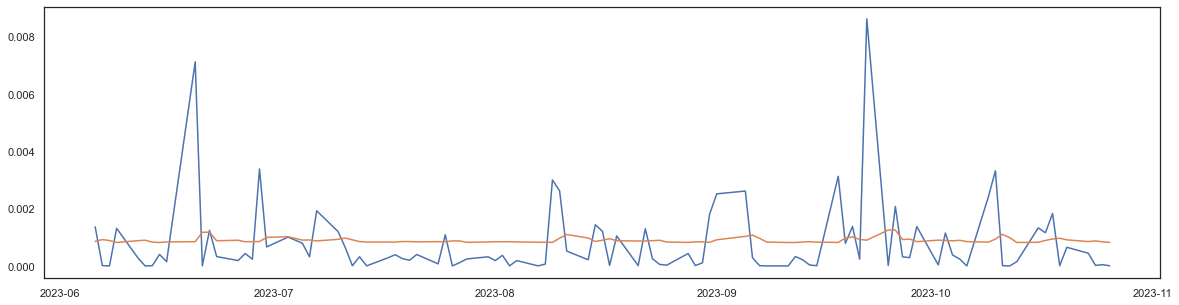

In [1768]:
import pandas as pd
import arch

# Suponha que você tenha um DataFrame chamado residuos_df com as colunas que deseja modelar.

# Crie um DataFrame vazio para armazenar os resultados modelados
residuos_modelados = {}

# Loop através das colunas do DataFrame residuos_df
for coluna in residuos_df.columns:
    
    
    coluna_a_modelar = residuos_df[coluna].dropna()**2

    if coluna not in ['RPMG3','UGPA3']:
        dados_treinamento = coluna_a_modelar.loc['2023-01-31':].dropna()
    else:
        dados_treinamento = coluna_a_modelar[:].dropna()

    modelo_treino = sm.tsa.arima.ARIMA(dados_treinamento, order=(2, 0, 0))
    parametros_treino = modelo_treino.fit().params

    model = sm.tsa.arima.ARIMA(coluna_a_modelar, order=(2, 0, 0))
    
    with model.fix_params(parametros_treino):
        modelo = model.fit()

    # Adicione os resultados à coluna correspondente no DataFrame residuos_modelados
    residuos_modelados[coluna] = modelo.fittedvalues


# Agora, residuos_modelados conterá os valores ajustados de volatilidade condicional para cada coluna de residuos_df
clear_output()
residuos_modelados = pd.DataFrame(residuos_modelados)


plt.figure(figsize=(20,5))
plt.plot((coluna_a_modelar)[-100:])
#plt.plot((residuos_modelados.iloc[:,3])[-100:])
plt.plot((modelo.fittedvalues)[-100:])

In [1769]:

residuos_combinados = residuos_df.copy().dropna(axis=1).drop(columns='LUPA3')
residuos_diferenciados = residuos_df.copy().dropna(axis=1).drop(columns='LUPA3')

for i in combinations(residuos_df.columns,2):
    columns_name = f'{i[0]}+{i[1]}'
    residuos_combinados[columns_name] = residuos_df[i[0]] +  residuos_df[i[1]]
    
    columns_name = f'{i[0]}-{i[1]}'
    residuos_diferenciados[columns_name] = residuos_df[i[0]] -  residuos_df[i[1]]

residuos_modelados_combinados = {}
residuos_modelados_diferenciados = {}

# Loop através das colunas do DataFrame residuos_df
for coluna in residuos_combinados.columns:
    
    
    coluna_a_modelar = (residuos_combinados[coluna].dropna())
    dados_treinamento = coluna_a_modelar.loc[:'2023-01-31'].dropna()


    modelo = arch.arch_model(coluna_a_modelar).fit(update_freq=50)

    # Aplique o modelo a todo o período
    resultados_coluna = modelo.conditional_volatility - min(modelo.conditional_volatility)*.99
    
    # Adicione os resultados à coluna correspondente no DataFrame residuos_modelados
    residuos_modelados_combinados[coluna] = resultados_coluna
# Loop através das colunas do DataFrame residuos_df
for coluna in residuos_diferenciados.columns:
    
    
    coluna_a_modelar = (residuos_diferenciados[coluna].dropna())
    dados_treinamento = coluna_a_modelar.loc[:'2023-01-31'].dropna()


    modelo = arch.arch_model(coluna_a_modelar).fit(update_freq=50)

    # Aplique o modelo a todo o período
    resultados_coluna = modelo.conditional_volatility - min(modelo.conditional_volatility)*.99
    
    # Adicione os resultados à coluna correspondente no DataFrame residuos_modelados
    residuos_modelados_diferenciados[coluna] = resultados_coluna

# Agora, residuos_modelados conterá os valores ajustados de volatilidade condicional para cada coluna de residuos_df
clear_output()
residuos_modelados_combinados = pd.DataFrame(residuos_modelados_combinados)
residuos_modelados_diferenciados = pd.DataFrame(residuos_modelados_diferenciados)



In [1770]:

covariancia_base = residuos_df.corr()*0

covariancias_matrizes = {}

for date in hist_dat['2023-01-01':].index:
    covariancia_base_i = covariancia_base.copy()[:]

    std_deviations = []

    for linha in covariancia_base.index:
        for coluna in covariancia_base.columns:
            variancia_coluna = residuos_modelados.loc[date,coluna]
            variancia_linha = residuos_modelados.loc[date,linha]

            if linha != coluna:
                try:
                    variancia_coluna_linha_soma = residuos_modelados_combinados.loc[date,f'{linha}+{coluna}']
                except:
                    variancia_coluna_linha_soma = residuos_modelados_combinados.loc[date,f'{coluna}+{linha}']

                try:
                    variancia_coluna_linha_diferenca = residuos_modelados_diferenciados.loc[date,f'{linha}-{coluna}']
                except:
                    variancia_coluna_linha_diferenca = residuos_modelados_diferenciados.loc[date,f'{coluna}-{linha}']

                

            if coluna == linha:
                covariancia_usada = variancia_linha 
                
            else:
                covariancia_usada = (variancia_coluna_linha_soma - variancia_coluna_linha_diferenca)/4

            covariancia_base_i.loc[linha,coluna] = covariancia_usada

    covariancias_matrizes[date] = covariancia_base_i


In [1771]:
pd.DataFrame(guarda_estimacoes).loc['2023-01-01':]

,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3,RPMG3,VBBR3,UGPA3,LUPA3,OPCT3,OSXB3
Date,,,,,,,,,,,,
2023-01-03,0.002252,0.000245,0.001091,0.005077,0.005289,0.001770,0.013669,0.000511,-0.003166,0.001335,-0.001807,105.496146
2023-01-04,-0.014390,0.000914,0.001840,0.015195,0.014690,-0.004009,-0.004874,0.000388,-0.003980,-0.000842,-0.010391,43.544815
2023-01-05,0.006202,-0.001744,0.007401,-0.000026,0.000657,0.004589,0.001592,0.000234,-0.000960,0.001528,-0.003283,145.021906
2023-01-06,0.014171,-0.001811,-0.005392,-0.008982,-0.011170,0.012042,-0.005407,0.000388,-0.000268,0.000227,0.015308,160.400669
2023-01-09,0.003239,-0.000575,-0.003106,-0.004443,-0.003124,0.000932,0.000098,-0.000192,-0.005927,0.003228,-0.002116,81.598722
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,-0.002603,-0.001327,0.001263,0.000347,0.001027,0.004136,-0.001001,0.000530,0.000306,0.001333,0.004909,75.587720
2023-10-23,-0.003834,0.001812,-0.000490,0.001342,0.000722,-0.000243,-0.005808,-0.000124,-0.003688,-0.000457,-0.007032,89.392653
2023-10-24,0.006821,0.000660,0.005294,0.000149,0.000898,0.005133,0.005126,0.000888,-0.007804,0.000765,-0.005415,98.185736


In [2002]:
posicoes = residuos_df.loc['2023-01-01':].copy()**2*0*0
posicoes['Exp_return'] = 0
posicoes['Exp_vol'] = 0
posicoes['Exp_Sharpe'] = 0

from matplotlib.ticker import PercentFormatter

returns_expected = pd.DataFrame(guarda_estimacoes).loc['2023-01-01':].drop(columns='OSXB3')



for date in posicoes.index:

    retornos_esperados = returns_expected.loc[date]

    cov_matrix_dia = covariancias_matrizes[date]

    n = len(retornos_esperados)

    pesos_iterados = {}
    retornos_iteracao = {}
    volatilidade_iteracao = {}


    for _1 in range(100000):
        _ = 'i'+str(_1)
        pesos_aleatorios = np.random.rand(n)*2-1
        pesos_aleatorios = pesos_aleatorios / np.sum(np.abs(pesos_aleatorios))
        retorno_esperado = pesos_aleatorios.dot(retornos_esperados)


        volatilidade_esperada = np.sqrt(abs(pesos_aleatorios.dot(cov_matrix_dia).dot(pesos_aleatorios)))

        retornos_iteracao[_] = retorno_esperado
        volatilidade_iteracao[_] = volatilidade_esperada
        pesos_iterados[_] = pesos_aleatorios

    rsults = pd.DataFrame(pesos_iterados).T

    rsults['Retorno'] = rsults.index.map(retornos_iteracao)
    rsults['Volatilidade'] = rsults.index.map(volatilidade_iteracao)
    rsults['Sharpe'] = (rsults['Retorno']-0.0005) / rsults['Volatilidade']

    vs = np.linspace(min(rsults['Volatilidade']), max(rsults['Volatilidade']), 4)
    escolhidos = [rsults[(rsults['Volatilidade'] >vs[i])&(rsults['Volatilidade'] <vs[i+1]) ].sort_values('Sharpe').index for i in range(3)]
    escolhidos  = [ i[-1] for i in escolhidos if len(i)>0 ]
    escolhidos = rsults.loc[escolhidos][list(range(11))]


    pesos_iterados = {}
    retornos_iteracao = {}
    volatilidade_iteracao = {}
    
    for _1 in range(1000):
        _ = 'i'+str(_1)
        pesos_aleatorios = np.random.rand(len(escolhidos))
        pesos_aleatorios = pesos_aleatorios.dot(escolhidos)
        pesos_aleatorios = pesos_aleatorios / np.sum(np.abs(pesos_aleatorios))

        retorno_esperado = pesos_aleatorios.dot(retornos_esperados)
        volatilidade_esperada = np.sqrt(abs(pesos_aleatorios.dot(cov_matrix_dia).dot(pesos_aleatorios)))

        retornos_iteracao[_] = retorno_esperado
        volatilidade_iteracao[_] = volatilidade_esperada
        pesos_iterados[_] = pesos_aleatorios

    

    rsults = pd.DataFrame(pesos_iterados).T

    rsults['Retorno'] = rsults.index.map(retornos_iteracao)
    rsults['Volatilidade'] = rsults.index.map(volatilidade_iteracao)
    rsults['Sharpe'] = (rsults['Retorno']-0.0005) / rsults['Volatilidade']
    

    vs = np.linspace(min(rsults['Volatilidade']), max(rsults['Volatilidade']), 5)
    escolhidos = [rsults[(rsults['Volatilidade'] >vs[i])&(rsults['Volatilidade'] <vs[i+1]) ].sort_values('Sharpe').index for i in range(4)]
    escolhidos  = [ i[-1] for i in escolhidos if len(i)>0 ]
    escolhidos = rsults.loc[escolhidos][list(range(11))]

    pesos_iterados = {}
    retornos_iteracao = {}
    volatilidade_iteracao = {}
    
    for _1 in range(1000):
        _ = 'i'+str(_1)
        pesos_aleatorios = np.random.rand(len(escolhidos))
        pesos_aleatorios = pesos_aleatorios.dot(escolhidos)
        pesos_aleatorios = pesos_aleatorios / np.sum(np.abs(pesos_aleatorios))

        retorno_esperado = pesos_aleatorios.dot(retornos_esperados)
        volatilidade_esperada = np.sqrt(abs(pesos_aleatorios.dot(cov_matrix_dia).dot(pesos_aleatorios)))

        retornos_iteracao[_] = retorno_esperado
        volatilidade_iteracao[_] = volatilidade_esperada
        pesos_iterados[_] = pesos_aleatorios
    
    

    rsults = pd.DataFrame(pesos_iterados).T

    rsults['Retorno'] = rsults.index.map(retornos_iteracao)
    rsults['Volatilidade'] = rsults.index.map(volatilidade_iteracao)
    rsults['Sharpe'] = (rsults['Retorno']-0.0005) / rsults['Volatilidade']

    escolhido = rsults.sort_values('Sharpe').index[-1]

    posicoes.loc[date] = rsults.loc[escolhido].to_list()





    
    

In [2003]:
posicoes['Real_return'] = ((posicoes[historical_data.columns[1:-2]] * historical_data.pct_change().loc['2023-01-01':][historical_data.columns[1:-2]]).sum(axis=1))
posicoes['LowerBand'] = posicoes['Exp_return'] -  2* posicoes['Exp_vol'].clip(0.01,2)
posicoes['SupBand'] = posicoes['Exp_return'] +  2*posicoes['Exp_vol'].clip(0.01,2)

posicoes
posicoes['Cota'] = (1 + posicoes['Real_return']).cumprod().shift(1).fillna(1)
posicoes['Expected_Cota'] = (1+posicoes['Exp_return'])*posicoes['Cota'].shift(-1)

returns_backtest = (historical_data['2023-01-01':]/historical_data['2023-01-01':].iloc[0])
returns_backtest['Portfolio'] = posicoes['Cota']

df_ex_post = returns_backtest[['RRRP3', 'CSAN3', 'ENAT3', 'PETR3', 'PETR4', 'PRIO3', 'RPMG3', 'VBBR3',
       'UGPA3', 'LUPA3', 'OPCT3']]

cov = df_ex_post.pct_change().cov()
returns = df_ex_post.iloc[-1]

import numpy as np
from scipy.optimize import minimize

# Suponha que você tenha a matriz de covariância 'cov' e os retornos finais 'returns' definidos

# Função que calcula o negativo do Índice de Sharpe
def negative_sharpe(weights, cov_matrix, returns, risk_free_rate):
    # Calcula o retorno esperado do portfólio
    portfolio_return = np.sum(returns * weights)
    # Calcula o risco (volatilidade) do portfólio
    portfolio_stddev = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    # Calcula o Índice de Sharpe negativo (a ser minimizado)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    return -sharpe_ratio

# Número de ativos no portfólio
num_assets = len(returns)

# Suponha uma taxa livre de risco de 12% (convertida para uma taxa diária)
risk_free_rate = (1 + 0.12) ** (1 / 252) - 1

# Suponha pesos iniciais iguais para todos os ativos
initial_weights = np.array([1 / num_assets] * num_assets)

# Restrição: a soma dos pesos deve ser igual a 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Limite de peso para cada ativo (0 a 1)
bounds = tuple((0.001, 0.99) for asset in range(num_assets))

# Minimiza o negativo do Índice de Sharpe para encontrar os pesos ideais
result = minimize(negative_sharpe, initial_weights, args=(cov, returns, risk_free_rate),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Os pesos ótimos estão em result.x
optimal_weights = result.x

# O valor máximo do Índice de Sharpe é -result.fun (positivo)
max_sharpe = -result.fun

print("Pesos ótimos:", optimal_weights)
print("Máximo Índice de Sharpe:", max_sharpe)



Pesos ótimos: [0.001      0.001      0.001      0.001      0.35368596 0.07436038
 0.08189038 0.001      0.37186317 0.001      0.11220011]
Máximo Índice de Sharpe: 126.02179839863992


c:\Users\diogo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds


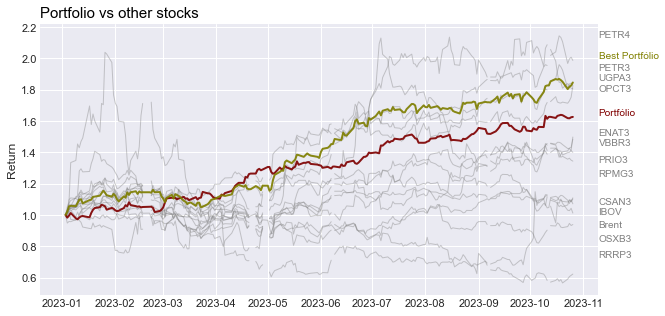

In [2004]:

returns_backtest['Best_portfolio'] = (1+df_ex_post.pct_change().dot(optimal_weights)).cumprod().fillna(1)

# Make a data frame
df=returns_backtest.copy()

# Change the style of plot
plt.style.use('seaborn-darkgrid')

# set figure size
plt.figure(figsize=(10, 5))
 
# plot multiple lines
for column in df.columns:
    plt.plot( df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(df.index, df['Portfolio'], marker='', color='maroon', linewidth=2, alpha=0.9)
plt.plot(df.index, df['Best_portfolio'], marker='', color='olive', linewidth=2, alpha=0.9)
     
# Let's annotate the plot
num=0
for i in df.values[-1][1:]:
    num+=1
    name=list(df.iloc[-1].sort_values().index)[num]
    value = list(df.iloc[-1].sort_values())[num]
    if name != 'Portfolio' and name != 'Best_portfolio':
        plt.text( df.index[-1] + pd.DateOffset(15) ,num/16+0.2 + value/2 , name, horizontalalignment='left', size='small', color='grey')
    if name == 'Portfolio':
        plt.text( df.index[-1] + pd.DateOffset(15) ,num/16+0.2 + value/2, 'Portfólio', horizontalalignment='left', size='small', color='maroon')
    if name == 'Best_portfolio':
        plt.text( df.index[-1] + pd.DateOffset(15) ,num/16+0.2 + value/2, 'Best Portfólio', horizontalalignment='left', size='small', color='olive')

# And add a special annotation for the group we are interested in

# Add titles
plt.title("Portfolio vs other stocks", loc='left', fontsize=15, fontweight=1, color='Black')
plt.ylabel("Return")

# Show the graph
plt.show()

In [2005]:

desvios = returns_backtest.pct_change().std()
retornos = returns_backtest.iloc[-1]-1
df_results = pd.DataFrame([retornos,desvios]).T
df_results.columns = ['Retorno','Volatilidade']
df_results['Sharpe'] = (df_results['Retorno'] - 0.12) / (df_results['Volatilidade']*np.sqrt(252))
df_results['VaR 5%'] = returns_backtest.pct_change().quantile(0.05)
df_results['Dias acima do índice'] = (returns_backtest.pct_change().T > returns_backtest.pct_change()['IBOV'].values ).mean(axis=1)
df_results

,Retorno,Volatilidade,Sharpe,VaR 5%,Dias acima do índice
Brent,0.071011,0.019384,-0.159205,-0.037213,0.533981
RRRP3,-0.061130,0.032980,-0.345974,-0.045904,0.451456
CSAN3,0.108965,0.019257,-0.036097,-0.031006,0.485437
ENAT3,0.497196,0.026740,0.888586,-0.040273,0.514563
PETR3,0.827325,0.020832,2.138872,-0.030254,0.553398
PETR4,0.986002,0.020510,2.659858,-0.031251,0.572816
PRIO3,0.399417,0.023197,0.758803,-0.034794,0.470874
RPMG3,0.343558,0.030488,0.461910,-0.041806,0.432039
VBBR3,0.482772,0.022474,1.016860,-0.029601,0.524272
UGPA3,0.823369,0.019048,2.326157,-0.024353,0.538835


In [2000]:
print(df_results.applymap(lambda x: f'{x*100:.2f}%').to_latex())

\begin{tabular}{llllll}
\toprule
{} &  Retorno & Volatilidade &   Sharpe &  VaR 5\% & Dias acima do índice \\
\midrule
Brent          &    7.10\% &        1.94\% &  -15.92\% &  -3.72\% &               53.40\% \\
RRRP3          &   -6.11\% &        3.30\% &  -34.60\% &  -4.59\% &               45.15\% \\
CSAN3          &   10.90\% &        1.93\% &   -3.61\% &  -3.10\% &               48.54\% \\
ENAT3          &   49.72\% &        2.67\% &   88.86\% &  -4.03\% &               51.46\% \\
PETR3          &   82.73\% &        2.08\% &  213.89\% &  -3.03\% &               55.34\% \\
PETR4          &   98.60\% &        2.05\% &  265.99\% &  -3.13\% &               57.28\% \\
PRIO3          &   39.94\% &        2.32\% &   75.88\% &  -3.48\% &               47.09\% \\
RPMG3          &   34.36\% &        3.05\% &   46.19\% &  -4.18\% &               43.20\% \\
VBBR3          &   48.28\% &        2.25\% &  101.69\% &  -2.96\% &               52.43\% \\
UGPA3          &   82.34\% &        1.90\% &

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\261785399.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results.applymap(lambda x: f'{x*100:.2f}%').to_latex())


c:\Users\diogo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volatilidade', ylabel='Retorno'>

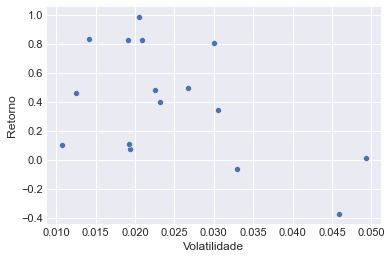

In [1948]:
sns.scatterplot(df_results['Volatilidade'],df_results['Retorno'])

In [2011]:
posicoes.head(5)

,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3,RPMG3,VBBR3,UGPA3,LUPA3,OPCT3,Exp_return,Exp_vol,Exp_Sharpe,Real_return,LowerBand,SupBand,Cota,Expected_Cota,Under_cota
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.079843,-0.043138,0.089189,-0.055337,0.116234,0.028105,0.242683,-0.022582,0.097666,0.112676,-0.112547,0.003641,0.009407,0.333862,-0.017360,-0.016359,0.023641,1.000000,0.986218,1.000000
2023-01-04,-0.161032,-0.067085,0.022435,0.245671,0.147936,-0.077083,-0.165790,0.039183,0.012253,0.030606,-0.030926,0.009582,0.008438,1.076329,0.013296,-0.010418,0.029582,0.982640,1.005246,0.989582
2023-01-05,0.216719,-0.024084,0.240710,-0.002996,-0.130661,0.123713,0.007955,0.049560,0.029730,0.043315,-0.130558,0.004140,0.009198,0.395779,0.016596,-0.015860,0.024140,0.995705,1.016421,0.967056
2023-01-06,0.065395,0.031657,-0.017569,-0.042835,-0.111580,0.184071,-0.127743,-0.020886,-0.069568,-0.167537,0.161158,0.007942,0.014535,0.512006,-0.033266,-0.021128,0.037012,1.012230,0.986329,0.974668
2023-01-09,0.135257,-0.015304,-0.132060,-0.159233,-0.101973,0.001052,0.036264,-0.089245,-0.148367,0.075201,-0.106045,0.003251,0.000369,7.451260,-0.006546,-0.016749,0.023251,0.978557,0.975312,0.995276


In [2015]:
posicoes['Under_cota'] = ((1+posicoes['LowerBand']) * posicoes['Cota'].shift(1)).fillna(1)
posicoes['Sup_cota'] = ((1+posicoes['SupBand']) * posicoes['Cota'].shift(1)).fillna(1)
posicoes['Expected'] = ((1+posicoes['Exp_return']) * posicoes['Cota'].shift(1)).fillna(1)

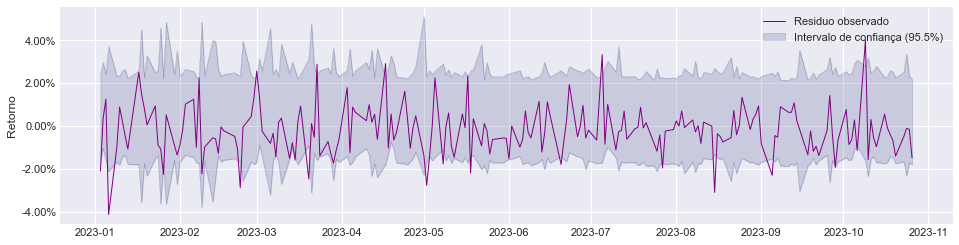

In [2066]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Suponha que 'posicoes' é o seu DataFrame
low = 100*posicoes['LowerBand']
sup = 100*posicoes['SupBand']
neutral = 100*posicoes['Exp_return']
real = 100*posicoes['Real_return']
resid_obs = (real-neutral)

fig, ax = plt.subplots(figsize=(16, 4))

# Plot lines
ax.plot( sup, color="midnightblue",linewidth=0.1)
ax.plot( low, color="midnightblue",linewidth=0.1)
#ax.plot( neutral, color="black",alpha=0.9,linestyle='--',linewidth=1, label='Retorno esperado')
ax.plot( resid_obs, color="purple",alpha=1,linewidth=1,label = 'Residuo observado')

# Fill area when income > expenses with green
ax.fill_between(sup.index, sup, low, where=(sup > low), 
    interpolate=True, color="midnightblue", alpha=0.15, 
    label="Intervalo de confiança (95.5%)"
)
ax.legend()

# Format y-axis as percentage
fmt = '{x:.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
# Set y-axis label
ax.set_ylabel('Retorno')

plt.show()


c:\Users\diogo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


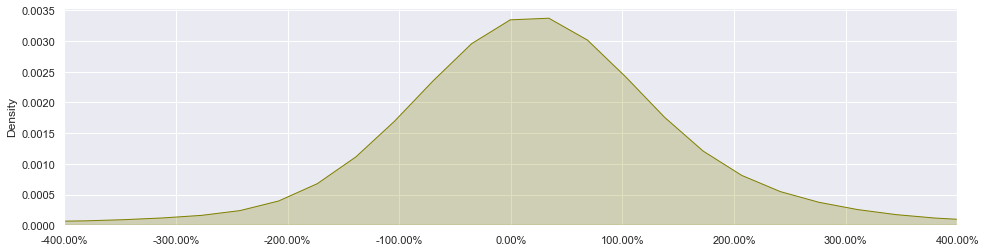

In [2087]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
# 
fig, ax = plt.subplots(figsize=(16, 4))
 
sns.set(style="darkgrid")

# Large bandwidth
sns.kdeplot((posicoes['Exp_return']-posicoes['Real_return'])/(posicoes['Exp_vol']), shade=True, bw=0.15, color="olive")


# Format y-axis as percentage
fmt = '{x:.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
# Set y-axis label


ax.set_xlim(-400,400)

plt.show()

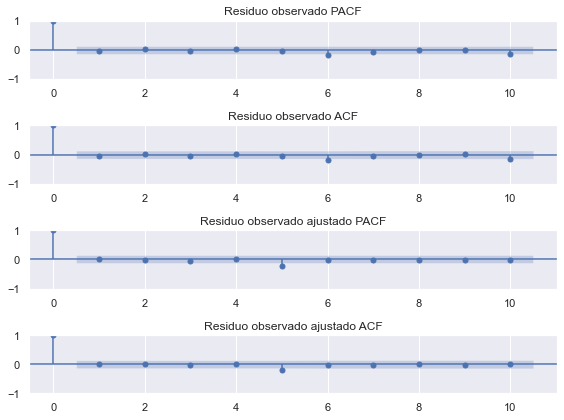

In [2132]:
pd.DataFrame()

fig,ax = plt.subplots(4,1,figsize=(8,6))

sm.graphics.tsa.plot_pacf(resid_obs, lags=10, method="ywm",ax=ax[0])
sm.graphics.tsa.plot_acf(resid_obs, lags=10,ax=ax[1])

ax[0].title.set_text('Residuo observado PACF')
ax[1].title.set_text('Residuo observado ACF')


sm.graphics.tsa.plot_pacf((posicoes['Exp_return']-posicoes['Real_return'])/(posicoes['Exp_vol']), lags=10, method="ywm",ax=ax[2])
sm.graphics.tsa.plot_acf((posicoes['Exp_return']-posicoes['Real_return'])/(posicoes['Exp_vol']), lags=10,ax=ax[3])

ax[2].title.set_text('Residuo observado ajustado PACF')
ax[3].title.set_text('Residuo observado ajustado ACF')

fig.tight_layout()
plt.show()


## KK


In [ ]:
covariancias_matrizes[date]

,RRRP3,CSAN3,ENAT3,PETR3,PETR4,PRIO3,RPMG3,VBBR3,UGPA3,LUPA3,OPCT3
RRRP3,0.014677,0.000640,0.000348,0.000972,0.001399,0.001176,-1.750252e-04,-3.732052e-06,0.000141,-0.000396,0.000468
CSAN3,0.000640,0.012499,-0.000453,-0.000209,-0.001005,-0.000186,4.573458e-05,1.133940e-03,-0.000089,0.000824,-0.000019
ENAT3,0.000348,-0.000453,0.013406,-0.000879,-0.001010,0.000271,2.185245e-04,-3.801872e-05,0.000205,0.000422,0.002176
PETR3,0.000972,-0.000209,-0.000879,0.017397,0.004070,-0.000555,5.325245e-06,-5.555228e-04,-0.000653,-0.000929,-0.000758
PETR4,0.001399,-0.001005,-0.001010,0.004070,0.018858,-0.000621,9.673129e-06,-2.941242e-04,-0.000853,-0.000753,-0.000960
PRIO3,0.001176,-0.000186,0.000271,-0.000555,-0.000621,0.014882,-7.355674e-05,-7.616910e-05,0.000193,-0.000145,0.000320
RPMG3,-0.000175,0.000046,0.000219,0.000005,0.000010,-0.000074,1.350860e-02,-5.788184e-07,0.000191,0.000839,-0.000057
VBBR3,-0.000004,0.001134,-0.000038,-0.000556,-0.000294,-0.000076,-5.788184e-07,1.068779e-02,-0.000031,0.001436,0.000016
UGPA3,0.000141,-0.000089,0.000205,-0.000653,-0.000853,0.000193,1.907575e-04,-3.120739e-05,0.010801,0.000763,0.000148
LUPA3,-0.000396,0.000824,0.000422,-0.000929,-0.000753,-0.000145,8.394907e-04,1.435520e-03,0.000763,0.041815,-0.000070


C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\353429448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_dat.dropna(inplace=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\353429448.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  residuos = residuos.append(df_i)
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\353429448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_dat.dropna(inplace=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\353429448.py:25: FutureWarning: The frame.append method

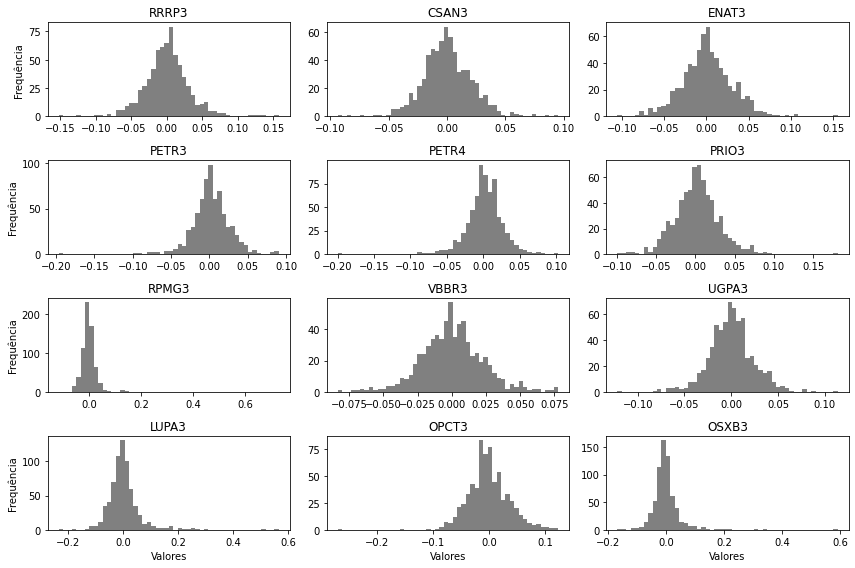

In [198]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que 'markcezar' seja o seu DataFrame
# Crie uma figura com 3 linhas e 4 colunas para a grade de gráficos
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

# Obtenha uma lista das colunas do DataFrame
colunas = modelos_.index
residuos = pd.DataFrame(columns=['Ativo','Residuo'])

# Itere sobre as colunas e crie um histograma para cada uma delas
for i, coluna in enumerate(colunas):
    maskara = ~modelo[coluna].isna()
    hist_dat = modelo[maskara] 
    hist_dat.dropna(inplace=True)
    x_ = [ i.replace("('","").replace("')","").replace("',)","") for i in modelos_.loc[coluna][0].split("', '")]

    Y = hist_dat[coluna]
    X = hist_dat[x_]

    regressor = sm.OLS(Y,X).fit()

    df_i = pd.DataFrame({'Ativo':coluna, 'Residuo':regressor.resid})
    residuos = residuos.append(df_i)


    row = i // 3  # Linha atual
    col = i % 3   # Coluna atual
    axes[row, col].hist(regressor.resid, bins=50,color='gray')  # Personalize o número de bins conforme necessário
    axes[row, col].set_title(coluna)
    
    # Defina etiquetas de eixos apenas para a primeira coluna e a última linha
    if row == 3:
        axes[row, col].set_xlabel('Valores')
    if col == 0:
        axes[row, col].set_ylabel('Frequência')

# Ajuste o layout para evitar sobreposição de títulos
plt.tight_layout()

# Exiba os gráficos
plt.show()


In [213]:
ativos_dict

{0: 'RRRP3',
 1: 'CSAN3',
 2: 'ENAT3',
 3: 'PETR3',
 4: 'PETR4',
 5: 'PRIO3',
 6: 'RPMG3',
 7: 'VBBR3',
 8: 'UGPA3',
 9: 'LUPA3',
 10: 'OPCT3',
 11: 'OSXB3'}

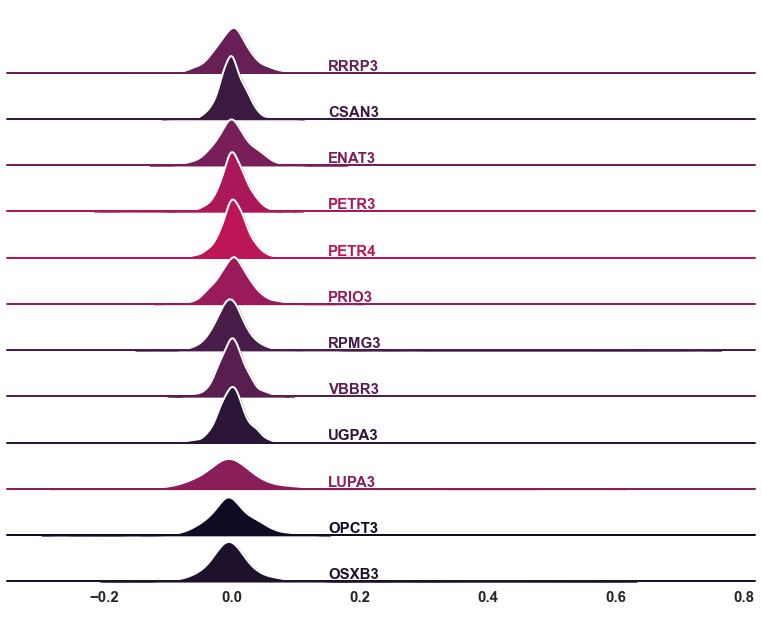

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

month_mean_serie = residuos.groupby('Ativo')['Residuo'].mean()
residuos['mean_month'] = residuos['Ativo'].map(month_mean_serie)

ativos_dict = dict(zip(range(len(residuos['Ativo'].unique())),residuos['Ativo'].unique()))


# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='rocket', n_colors=25)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(residuos, row='Ativo', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Residuo',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Residuo', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(.15, 0.9, ativos_dict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    ax.set_ylabel("")
    #ax.set_xlim(-0.2, 0.4)
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel(' ', fontweight='bold', fontsize=15)

plt.show()

<AxesSubplot:xlabel='Date'>

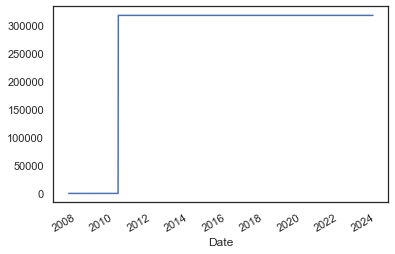

In [301]:
historical_data[ativo].pct_change().fillna(0).cumsum().plot()

In [403]:

import pandas as pd
import arch

model = arch.arch_model(regressor.resid**2, vol='Garch', p=3, q=3)

model.volatility.max_iter = 1000  # Aumenta o número máximo de iterações
model.volatility.tol = 1e-25  # Reduz a tolerância de convergência

results = model.fit()



print(results.summary())

Iteration:      1,   Func. Count:     10,   Neg. LLF: 65457440295.58598
Iteration:      2,   Func. Count:     27,   Neg. LLF: 348694743.1865653
Iteration:      3,   Func. Count:     43,   Neg. LLF: 362382635.4192759
Iteration:      4,   Func. Count:     59,   Neg. LLF: 318822235.85594785
Iteration:      5,   Func. Count:     75,   Neg. LLF: -10709.612961224888
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10709.612967762252
            Iterations: 9
            Function evaluations: 75
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10709.6
Distribution:                  Normal   AIC:                          -21403.2
Method:            Maximum Likeli

c:\Users\diogo\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004381. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [374]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import arch


acf_result = (historical_data.pct_change()**2).dropna().apply(acf, nlags=10)[['Brent','IBOV']]
pacf_result = (historical_data.pct_change()**2).dropna().apply(pacf, nlags=10)[['Brent','IBOV']]


# get p-value for anyone variables


resultados_completos = pd.DataFrame(columns=['Ativo','IBOV','Brent'])

resultados_garch = pd.DataFrame(columns=['Ativo','R2'])

for ativo in modelos_.index[:]:
    maskara = historical_data[ativo].pct_change().fillna(0).abs().cumsum()>0.5
    hist_dat = historical_data[maskara]
    hist_dat = hist_dat[['Brent','IBOV',ativo]].pct_change().dropna()
    x_ = ['Brent','IBOV']

    Y = hist_dat[ativo]

    X = hist_dat[x_]
    X = sm.add_constant(X)

    regressor = sm.OLS(Y,X).fit()

    resultados_estimados = regressor.fittedvalues
    

    acf_result[ativo] = pd.DataFrame(regressor.resid**2).dropna().apply(acf,nlags=10)
    pacf_result[ativo] = pd.DataFrame(regressor.resid**2).dropna().apply(pacf,nlags=10)

    resultados_completos = resultados_completos.append({'Ativo': ativo,'IBOV':
norm.cdf(-abs(regressor.tvalues['IBOV']))*2, 'Brent': 
norm.cdf(-abs(regressor.tvalues['Brent']))*2}, ignore_index=True)

resultados_completos

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1118671706.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_completos = resultados_completos.append({'Ativo': ativo,'IBOV':
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1118671706.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_completos = resultados_completos.append({'Ativo': ativo,'IBOV':
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1118671706.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_completos = resultados_completos.append({'Ativo': ativo,'IBOV':
C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1118671706.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

,Ativo,IBOV,Brent
0,RRRP3,1.536144e-37,2.594679e-26
1,CSAN3,0.000000e+00,5.119292e-03
2,ENAT3,1.605621e-107,1.090295e-36
3,PETR3,0.000000e+00,9.766936e-68
4,PETR4,0.000000e+00,5.998096e-52
5,PRIO3,1.740186e-75,6.406256e-30
6,RPMG3,2.159999e-19,5.363816e-04


In [364]:

print(round(pacf_result.T,2).to_latex( escape=False))

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &   0  &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 \\
\midrule
Brent &  1.0 &  0.01 &  0.19 &  0.14 &  0.09 &  0.20 &  0.10 & -0.04 & -0.01 &  0.00 &  0.00 \\
IBOV  &  1.0 &  0.00 &  0.00 &  0.05 &  0.02 &  0.05 &  0.01 &  0.02 & -0.02 &  0.05 &  0.07 \\
RRRP3 &  1.0 &  0.03 &  0.02 & -0.00 &  0.00 &  0.09 &  0.02 &  0.00 &  0.08 & -0.02 & -0.02 \\
CSAN3 &  1.0 &  0.13 &  0.22 &  0.07 &  0.09 &  0.10 &  0.13 &  0.01 &  0.11 &  0.08 &  0.06 \\
ENAT3 &  1.0 &  0.03 &  0.02 &  0.01 &  0.00 &  0.00 &  0.01 &  0.01 & -0.00 &  0.02 &  0.00 \\
PETR3 &  1.0 &  0.09 &  0.02 &  0.04 &  0.05 &  0.12 &  0.00 &  0.04 &  0.04 &  0.01 &  0.00 \\
PETR4 &  1.0 &  0.16 &  0.03 &  0.05 &  0.04 &  0.12 &  0.05 &  0.01 &  0.05 & -0.00 &  0.01 \\
PRIO3 &  1.0 &  0.15 & -0.01 &  0.04 &  0.01 &  0.01 &  0.00 &  0.02 &  0.02 & -0.00 & -0.00 \\
RPMG3 &  1.0 &  0.31 & -0.03 &  0.06 &  0.01 &  0.04 & -0.00 &  0.03 & -0.01 &  0.01 &  0.0

C:\Users\diogo\AppData\Local\Temp\ipykernel_17172\1361512261.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(pacf_result.T,2).to_latex( escape=False))


,IBOV
Date,
2007-07-30,NaN
2007-07-31,5.107091e-05
2007-08-01,8.859603e-07
2007-08-02,7.100503e-05
2007-08-03,1.138049e-03
...,...
2023-10-20,5.545940e-05
2023-10-23,1.069193e-05
2023-10-24,7.503890e-05
